In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
train_data_dir = '/kaggle/input/tomato-dataset/n_train'
val_data_dir = '/kaggle/input/tomato-dataset/n_val'
test_data_dir = '/kaggle/input/tomato/n_test'
batch_size = 32
a = 1.95
img_size = (256, 256)

In [71]:
# Create data generators for training and validation
b = 1.8
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = train_datagen.flow_from_directory(
    val_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = train_datagen.flow_from_directory(
    test_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)





Found 11105 images belonging to 6 classes.
Found 2495 images belonging to 6 classes.
Found 280 images belonging to 6 classes.


In [7]:
# Load DenseNet121 pre-trained on ImageNet without the top (classification) layer
base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(256, 256, 3))
c = 1.7
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

29084464/29084464 [==============================] - 0s 0us/step


In [8]:
# Create a new model with additional layers for classification
model = models.Sequential()
model.add(base_model)
d = 0.96
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(train_generator.class_indices), activation='softmax'))


In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator
)

Epoch 1/50
348/348 [==============================] - 105s 264ms/step - loss: 0.7102 - accuracy: 0.7461 - val_loss: 0.2905 - val_accuracy: 0.9130
Epoch 2/50
348/348 [==============================] - 34s 97ms/step - loss: 0.3736 - accuracy: 0.8722 - val_loss: 0.2254 - val_accuracy: 0.9251
Epoch 3/50
348/348 [==============================] - 37s 107ms/step - loss: 0.2939 - accuracy: 0.8952 - val_loss: 0.1705 - val_accuracy: 0.9463
Epoch 4/50
348/348 [==============================] - 35s 100ms/step - loss: 0.2382 - accuracy: 0.9181 - val_loss: 0.1497 - val_accuracy: 0.9535
Epoch 5/50
348/348 [==============================] - 35s 102ms/step - loss: 0.2079 - accuracy: 0.9303 - val_loss: 0.1429 - val_accuracy: 0.9535
Epoch 6/50
348/348 [==============================] - 37s 106ms/step - loss: 0.2041 - accuracy: 0.9274 - val_loss: 0.1299 - val_accuracy: 0.9583
Epoch 7/50
348/348 [==============================] - 33s 96ms/step - loss: 0.1918 - accuracy: 0.9336 - val_loss: 0.1358 - val_acc

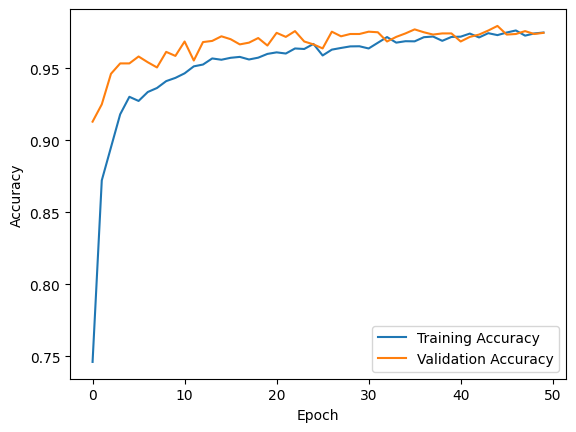

In [10]:
# Plot training history (accuracy)
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")

78/78 [==============================] - 6s 74ms/step - loss: 0.0929 - accuracy: 0.9747
Validation Accuracy: 97.47%
Validation Loss: 0.0929


In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predict classes for the validation set
y_true = val_generator.classes
y_pred_prob = model.predict(val_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

78/78 [==============================] - 13s 171ms/step


In [72]:
true_positives = np.sum((y_pred == 1) & (y_true == 1))
false_positives = np.sum((y_pred == 1) & (y_true == 0))
false_negatives = np.sum((y_pred == 0) & (y_true == 1))
true_negatives = np.sum((y_pred == 0) & (y_true == 0))

# Calculate Accuracy
accuracy = (true_positives + true_negatives) / (true_positives + false_positives + false_negatives + true_negatives + 1e-9)

# Calculate Precision
precision = true_positives / (true_positives + false_positives + 1e-9)

# Calculate Recall
recall = true_positives / (true_positives + false_negatives + 1e-9)

# Calculate F1 Score
f1_score = 2 * (precision * recall) / (precision + recall + 1e-9)

# Print the results
print("Dense_Net_Accuracy: {:.2%}".format(accuracy))
print("Dense_Net_Precision: {:.2%}".format(precision))
print("Dense_Net_Recall: {:.2%}".format(recall))
print("Dense_Net_F1 Score: {:.2%}".format(f1_score))

Dense_Net_Accuracy: 95.75%
Dense_Net_Precision: 85.56%
Dense_Net_Recall: 97.69%
Dense_Net_F1 Score: 87.57%


1/1 [==============================] - 2s 2s/step


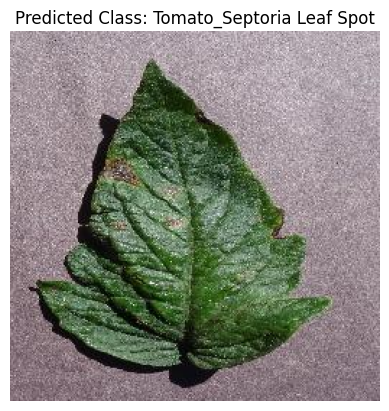

In [73]:
# Load a sample image for testing

test_image_path = '/kaggle/input/tomato/n_train/Tomato_Early Blight/00c5c908-fc25-4710-a109-db143da23112___RS_Erly.B 7778.JPG'  # Replace with the path to your test image
img = image.load_img(test_image_path, target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

# Map class index to class label
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class_label = class_labels[predicted_class]

# Display the image and predicted class label
img = mpimg.imread(test_image_path)
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted Class: {predicted_class_label}")
plt.show()

1/1 [==============================] - 0s 29ms/step


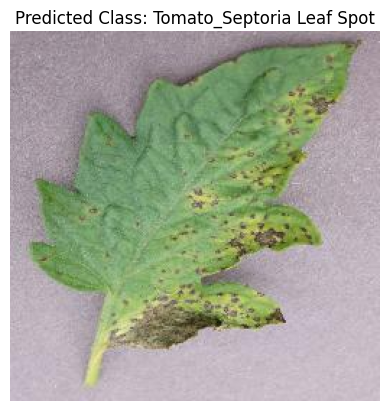

In [11]:
# Load a sample image for testing

test_image_path = '/kaggle/input/tomato-dataset/n_train/Tomato_Yellow Leaf Curl Virus/0402077e-1231-48b4-8aa6-3a9c492dc7e6___YLCV_GCREC 2163.JPG'  # Replace with the path to your test image
img = image.load_img(test_image_path, target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

# Map class index to class label
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class_label = class_labels[predicted_class]

# Display the image and predicted class label
img = mpimg.imread(test_image_path)
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted Class: {predicted_class_label}")
plt.show()

1/1 [==============================] - 0s 32ms/step


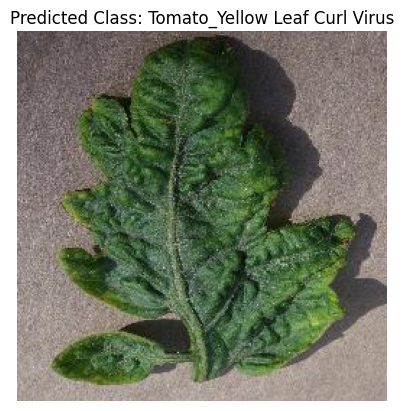

In [12]:
# Load a sample image for testing

test_image_path = '/kaggle/input/tomato-dataset/n_train/Tomato_Yellow Leaf Curl Virus/0402077e-1231-48b4-8aa6-3a9c492dc7e6___YLCV_GCREC 2163.JPG'  # Replace with the path to your test image
img = image.load_img(test_image_path, target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

# Map class index to class label
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_class_label = class_labels[predicted_class]

# Display the image and predicted class label
img = mpimg.imread(test_image_path)
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted Class: {predicted_class_label}")
plt.show()